In [42]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sn
from keras.layers import Lambda
from keras.models import Sequential
from matplotlib import pyplot as plt
import keras.applications.vgg16 as vgg16
from tensorflow.keras.models import Model
import keras.applications.mobilenet_v2 as mobilenet_v2
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import MobileNetV2
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout, Activation, GlobalAveragePooling2D, Input, Flatten

In [2]:
TRAIN_DATA_PATH = r'F:\Artificial Intelligence\Datasets\Garbage Seg V10\Dataset\train'
TEST_DATA_PATH = r'F:\Artificial Intelligence\Datasets\Garbage Seg V10\Dataset\test'
IMAGE_LENGTH = 100
IMAGE_HEIGHT = 100
IMAGE_CHANNELS = 3
BATCH_SIZE = 32

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    height_shift_range=0.2,
    width_shift_range=0.2
)
test_datagen = ImageDataGenerator(
    rescale=1./255
)
train_generator = train_datagen.flow_from_directory(
    TRAIN_DATA_PATH,
    target_size=(IMAGE_HEIGHT, IMAGE_LENGTH),
    batch_size=BATCH_SIZE
)
test_generator = test_datagen.flow_from_directory(
    TEST_DATA_PATH,
    target_size=(IMAGE_HEIGHT, IMAGE_LENGTH),
    batch_size=BATCH_SIZE
)

Found 13824 images belonging to 10 classes.
Found 1536 images belonging to 10 classes.


### VGG16 Transfer Learning Approach

In [4]:
def vgg16_preprocess(image):
    return vgg16.preprocess_input(image)

base_model = VGG16(
    include_top=False,
    input_shape=(IMAGE_HEIGHT, IMAGE_LENGTH, IMAGE_CHANNELS),
    weights="imagenet"
)
base_model.trainable = False

model = Sequential()

model.add(Input(shape=(IMAGE_HEIGHT, IMAGE_LENGTH, IMAGE_CHANNELS)))
model.add(Lambda(vgg16_preprocess))
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(10, activation='softmax')) 

model.compile(loss='squared_hinge', optimizer='adam', metrics=['categorical_accuracy', 'accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 100, 100, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 10)                5130      
                                                                 
Total params: 14,719,818
Trainable params: 5,130
Non-trainable params: 14,714,688
________________________________________

In [7]:
best_loss_checkpoint = ModelCheckpoint(
    filepath=f'../models/VGG16-best_loss_model.h5',
    monitor='loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)

best_val_loss_checkpoint = ModelCheckpoint(
    filepath=f'../models/VGG16-best_val_loss_model.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)

In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=100,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)   

Epoch 1/100
432/432 [==============================] - 955s 2s/step - loss: 1.1448 - categorical_accuracy: 0.3171 - accuracy: 0.3171 - val_loss: 1.1369 - val_categorical_accuracy: 0.3464 - val_accuracy: 0.3464
Epoch 2/100
432/432 [==============================] - 870s 2s/step - loss: 1.1364 - categorical_accuracy: 0.3468 - accuracy: 0.3468 - val_loss: 1.1355 - val_categorical_accuracy: 0.3464 - val_accuracy: 0.3464
Epoch 3/100
432/432 [==============================] - 881s 2s/step - loss: 1.1357 - categorical_accuracy: 0.3469 - accuracy: 0.3469 - val_loss: 1.1349 - val_categorical_accuracy: 0.3464 - val_accuracy: 0.3464
Epoch 4/100
432/432 [==============================] - 858s 2s/step - loss: 1.1349 - categorical_accuracy: 0.3477 - accuracy: 0.3477 - val_loss: 1.1352 - val_categorical_accuracy: 0.3470 - val_accuracy: 0.3470
Epoch 5/100
432/432 [==============================] - 855s 2s/step - loss: 1.1339 - categorical_accuracy: 0.3478 - accuracy: 0.3478 - val_loss: 1.1331 - val_ca

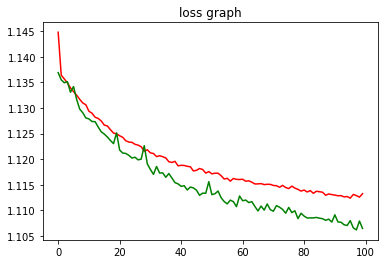

In [7]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'g')
plt.title('loss graph')
plt.show()

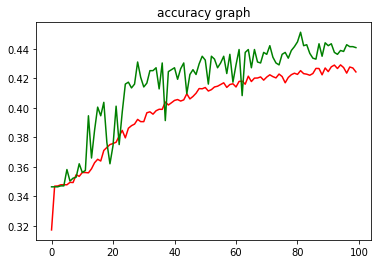

In [8]:
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'g')
plt.title('accuracy graph')
plt.show()

In [9]:
model.load_weights('../models/VGG16-best_loss_model.h5')

In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=100,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)   

Epoch 1/100
432/432 [==============================] - 844s 2s/step - loss: 1.1127 - categorical_accuracy: 0.4237 - accuracy: 0.4237 - val_loss: 1.1074 - val_categorical_accuracy: 0.4499 - val_accuracy: 0.4499
Epoch 2/100
432/432 [==============================] - 835s 2s/step - loss: 1.1123 - categorical_accuracy: 0.4280 - accuracy: 0.4280 - val_loss: 1.1068 - val_categorical_accuracy: 0.4538 - val_accuracy: 0.4538
Epoch 3/100
432/432 [==============================] - 942s 2s/step - loss: 1.1131 - categorical_accuracy: 0.4252 - accuracy: 0.4252 - val_loss: 1.1072 - val_categorical_accuracy: 0.4421 - val_accuracy: 0.4421
Epoch 4/100
432/432 [==============================] - 839s 2s/step - loss: 1.1124 - categorical_accuracy: 0.4279 - accuracy: 0.4279 - val_loss: 1.1076 - val_categorical_accuracy: 0.4486 - val_accuracy: 0.4486
Epoch 5/100
432/432 [==============================] - 836s 2s/step - loss: 1.1123 - categorical_accuracy: 0.4305 - accuracy: 0.4305 - val_loss: 1.1079 - val_ca

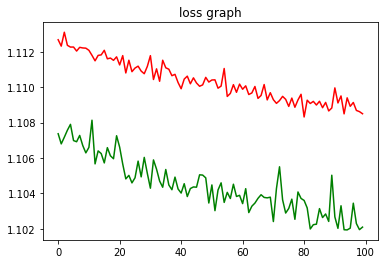

In [11]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'g')
plt.title('loss graph')
plt.show()

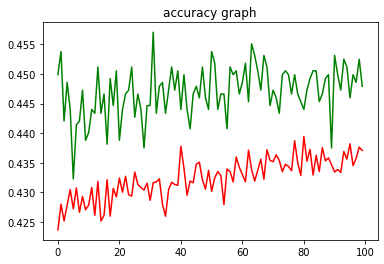

In [12]:
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'g')
plt.title('accuracy graph')
plt.show()

In [13]:
model.load_weights('../models/VGG16-best_loss_model.h5')

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=100,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)   

Epoch 1/100
432/432 [==============================] - 830s 2s/step - loss: 1.1095 - categorical_accuracy: 0.4342 - accuracy: 0.4342 - val_loss: 1.1028 - val_categorical_accuracy: 0.4486 - val_accuracy: 0.4486
Epoch 2/100
432/432 [==============================] - 829s 2s/step - loss: 1.1091 - categorical_accuracy: 0.4332 - accuracy: 0.4332 - val_loss: 1.1037 - val_categorical_accuracy: 0.4460 - val_accuracy: 0.4460
Epoch 3/100
432/432 [==============================] - 837s 2s/step - loss: 1.1094 - categorical_accuracy: 0.4344 - accuracy: 0.4344 - val_loss: 1.1021 - val_categorical_accuracy: 0.4583 - val_accuracy: 0.4583
Epoch 4/100
432/432 [==============================] - 835s 2s/step - loss: 1.1085 - categorical_accuracy: 0.4384 - accuracy: 0.4384 - val_loss: 1.1038 - val_categorical_accuracy: 0.4473 - val_accuracy: 0.4473
Epoch 5/100
432/432 [==============================] - 833s 2s/step - loss: 1.1088 - categorical_accuracy: 0.4358 - accuracy: 0.4358 - val_loss: 1.1030 - val_ca

KeyboardInterrupt: 

In [3]:
def vgg16_preprocess(image):
    return vgg16.preprocess_input(image)

base_model = VGG16(
    include_top=False,
    input_shape=(IMAGE_HEIGHT, IMAGE_LENGTH, IMAGE_CHANNELS),
    weights="imagenet"
)
base_model.trainable = False

model = Sequential()

model.add(Input(shape=(IMAGE_HEIGHT, IMAGE_LENGTH, IMAGE_CHANNELS)))
model.add(Lambda(vgg16_preprocess))
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(10, activation='softmax')) 

model.compile(loss='squared_hinge', optimizer='adam', metrics=['categorical_accuracy', 'accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 100, 100, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 10)                5130      
                                                                 
Total params: 14,719,818
Trainable params: 5,130
Non-trainable params: 14,714,688
________________________________________

In [38]:
model.load_weights('../models/VGG16-best_loss_model.h5')

In [39]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)   

Epoch 1/10
432/432 [==============================] - 871s 2s/step - loss: 1.1159 - categorical_accuracy: 0.4131 - accuracy: 0.4131 - val_loss: 1.1041 - val_categorical_accuracy: 0.4421 - val_accuracy: 0.4421
Epoch 2/10
432/432 [==============================] - 871s 2s/step - loss: 1.1155 - categorical_accuracy: 0.4139 - accuracy: 0.4139 - val_loss: 1.1032 - val_categorical_accuracy: 0.4460 - val_accuracy: 0.4460
Epoch 3/10
271/432 [=================>............] - ETA: 4:55 - loss: 1.1155 - categorical_accuracy: 0.4173 - accuracy: 0.4173

KeyboardInterrupt: 

### MobileNetV2 Transfer Learning Approach

In [8]:
def mobilenet_preprocess(image):
    return mobilenet_v2.preprocess_input(image)

base_model = MobileNetV2(
    include_top=False,
    input_shape=(IMAGE_HEIGHT, IMAGE_LENGTH, IMAGE_CHANNELS),
    weights="imagenet"
)
base_model.trainable = True

model = Sequential()

model.add(Input(shape=(IMAGE_HEIGHT, IMAGE_LENGTH, IMAGE_CHANNELS)))
model.add(Lambda(mobilenet_preprocess))
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(10, activation='softmax')) 

model.compile(loss='squared_hinge', optimizer='adam', metrics=['categorical_accuracy', 'accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_2 (Lambda)           (None, 100, 100, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 2,236,682
Non-

In [9]:
model.load_weights('../models/MOBNETv2-best_loss_model.h5')

ValueError: axes don't match array

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2
)
test_datagen = ImageDataGenerator(
    rescale=1./255
)
train_generator = train_datagen.flow_from_directory(
    TRAIN_DATA_PATH,
    target_size=(IMAGE_HEIGHT, IMAGE_LENGTH),
    batch_size=BATCH_SIZE
)
test_generator = test_datagen.flow_from_directory(
    TEST_DATA_PATH,
    target_size=(IMAGE_HEIGHT, IMAGE_LENGTH),
    batch_size=BATCH_SIZE
)

Found 13824 images belonging to 10 classes.
Found 1536 images belonging to 10 classes.


In [10]:
best_loss_checkpoint = ModelCheckpoint(
    filepath=f'../models/MOBNETv2-best_loss_model.h5',
    monitor='loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)

best_val_loss_checkpoint = ModelCheckpoint(
    filepath=f'../models/MOBNETv2-best_val_loss_model.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)

In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=100,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 1/100
432/432 [==============================] - 482s 1s/step - loss: 1.1325 - categorical_accuracy: 0.3494 - accuracy: 0.3494 - val_loss: 1.1248 - val_categorical_accuracy: 0.3470 - val_accuracy: 0.3470
Epoch 2/100
432/432 [==============================] - 152s 352ms/step - loss: 1.1237 - categorical_accuracy: 0.3778 - accuracy: 0.3778 - val_loss: 1.1179 - val_categorical_accuracy: 0.4108 - val_accuracy: 0.4108
Epoch 3/100
432/432 [==============================] - 153s 355ms/step - loss: 1.1190 - categorical_accuracy: 0.4047 - accuracy: 0.4047 - val_loss: 1.1140 - val_categorical_accuracy: 0.4342 - val_accuracy: 0.4342
Epoch 4/100
432/432 [==============================] - 154s 356ms/step - loss: 1.1155 - categorical_accuracy: 0.4230 - accuracy: 0.4230 - val_loss: 1.1108 - val_categorical_accuracy: 0.4277 - val_accuracy: 0.4277
Epoch 5/100
432/432 [==============================] - 152s 353ms/step - loss: 1.1133 - categorical_accuracy: 0.4329 - accuracy: 0.4329 - val_loss: 1.1

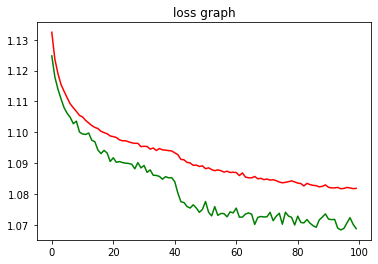

In [7]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'g')
plt.title('loss graph')
plt.show()

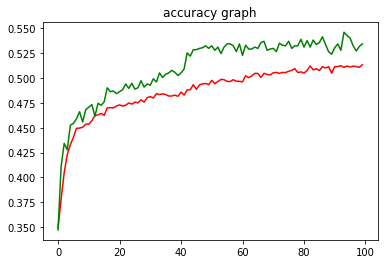

In [8]:
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'g')
plt.title('accuracy graph')
plt.show()

In [6]:
model.load_weights('../models/MOBNETv2-best_loss_model.h5')

In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=100,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 1/100
432/432 [==============================] - 419s 963ms/step - loss: 1.0727 - categorical_accuracy: 0.5371 - accuracy: 0.5371 - val_loss: 1.0637 - val_categorical_accuracy: 0.5527 - val_accuracy: 0.5527
Epoch 2/100
432/432 [==============================] - 154s 356ms/step - loss: 1.0732 - categorical_accuracy: 0.5349 - accuracy: 0.5349 - val_loss: 1.0627 - val_categorical_accuracy: 0.5599 - val_accuracy: 0.5599
Epoch 3/100
432/432 [==============================] - 151s 349ms/step - loss: 1.0727 - categorical_accuracy: 0.5362 - accuracy: 0.5362 - val_loss: 1.0638 - val_categorical_accuracy: 0.5560 - val_accuracy: 0.5560
Epoch 4/100
432/432 [==============================] - 165s 381ms/step - loss: 1.0728 - categorical_accuracy: 0.5346 - accuracy: 0.5346 - val_loss: 1.0595 - val_categorical_accuracy: 0.5612 - val_accuracy: 0.5612
Epoch 5/100
432/432 [==============================] - 164s 379ms/step - loss: 1.0738 - categorical_accuracy: 0.5316 - accuracy: 0.5316 - val_loss: 

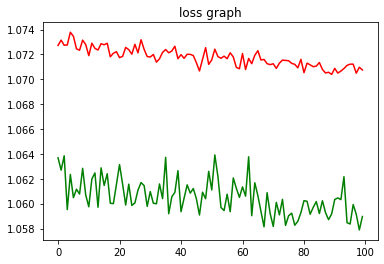

In [8]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'g')
plt.title('loss graph')
plt.show()

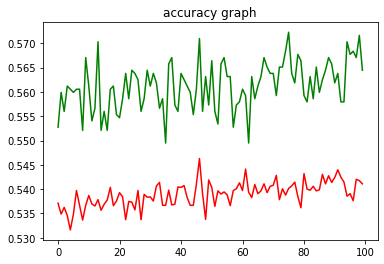

In [9]:
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'g')
plt.title('accuracy graph')
plt.show()

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(
    rescale=1./255
)
train_generator = train_datagen.flow_from_directory(
    TRAIN_DATA_PATH,
    target_size=(IMAGE_HEIGHT, IMAGE_LENGTH),
    batch_size=BATCH_SIZE
)
test_generator = test_datagen.flow_from_directory(
    TEST_DATA_PATH,
    target_size=(IMAGE_HEIGHT, IMAGE_LENGTH),
    batch_size=BATCH_SIZE
)

Found 13824 images belonging to 10 classes.
Found 1536 images belonging to 10 classes.


In [5]:
model.load_weights('../models/MOBNETv2-best_loss_model.h5')

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=100,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 1/100
432/432 [==============================] - 428s 984ms/step - loss: 1.0650 - categorical_accuracy: 0.5572 - accuracy: 0.5572 - val_loss: 1.0586 - val_categorical_accuracy: 0.5632 - val_accuracy: 0.5632
Epoch 2/100
432/432 [==============================] - 125s 289ms/step - loss: 1.0645 - categorical_accuracy: 0.5574 - accuracy: 0.5574 - val_loss: 1.0578 - val_categorical_accuracy: 0.5690 - val_accuracy: 0.5690
Epoch 3/100
432/432 [==============================] - 123s 286ms/step - loss: 1.0645 - categorical_accuracy: 0.5578 - accuracy: 0.5578 - val_loss: 1.0581 - val_categorical_accuracy: 0.5645 - val_accuracy: 0.5645
Epoch 4/100
432/432 [==============================] - 125s 289ms/step - loss: 1.0642 - categorical_accuracy: 0.5594 - accuracy: 0.5594 - val_loss: 1.0571 - val_categorical_accuracy: 0.5768 - val_accuracy: 0.5768
Epoch 5/100
432/432 [==============================] - 124s 286ms/step - loss: 1.0636 - categorical_accuracy: 0.5613 - accuracy: 0.5613 - val_loss: 

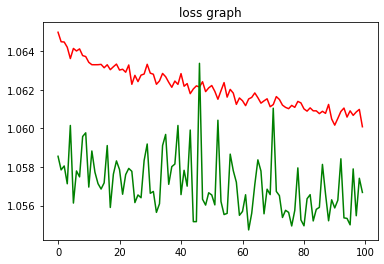

In [9]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'g')
plt.title('loss graph')
plt.show()

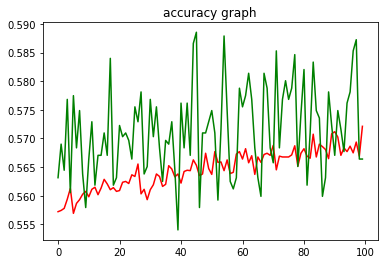

In [10]:
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'g')
plt.title('accuracy graph')
plt.show()

In [11]:
model.load_weights('../models/MOBNETv2-best_loss_model.h5')

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=100,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 1/100
432/432 [==============================] - 820s 2s/step - loss: 1.0649 - categorical_accuracy: 0.5545 - accuracy: 0.5545 - val_loss: 1.0580 - val_categorical_accuracy: 0.5618 - val_accuracy: 0.5618
Epoch 2/100
432/432 [==============================] - 100s 232ms/step - loss: 1.0644 - categorical_accuracy: 0.5578 - accuracy: 0.5578 - val_loss: 1.0559 - val_categorical_accuracy: 0.5755 - val_accuracy: 0.5755
Epoch 3/100
432/432 [==============================] - 100s 232ms/step - loss: 1.0640 - categorical_accuracy: 0.5598 - accuracy: 0.5598 - val_loss: 1.0599 - val_categorical_accuracy: 0.5605 - val_accuracy: 0.5605
Epoch 4/100
432/432 [==============================] - 100s 232ms/step - loss: 1.0639 - categorical_accuracy: 0.5581 - accuracy: 0.5581 - val_loss: 1.0569 - val_categorical_accuracy: 0.5684 - val_accuracy: 0.5684
Epoch 5/100
432/432 [==============================] - 101s 233ms/step - loss: 1.0643 - categorical_accuracy: 0.5580 - accuracy: 0.5580 - val_loss: 1.0

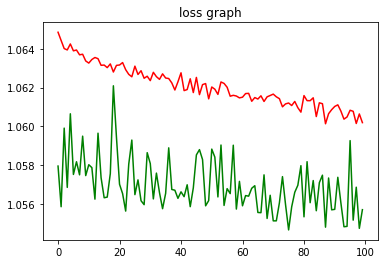

In [13]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'g')
plt.title('loss graph')
plt.show()

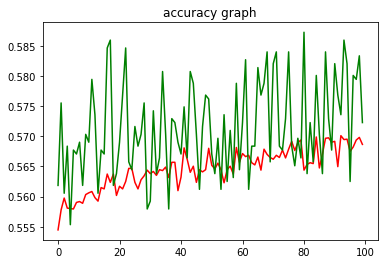

In [14]:
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'g')
plt.title('accuracy graph')
plt.show()

In [15]:
model.load_weights('../models/MOBNETv2-best_loss_model.h5')

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=100,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 1/100
432/432 [==============================] - 103s 238ms/step - loss: 1.0642 - categorical_accuracy: 0.5600 - accuracy: 0.5600 - val_loss: 1.0580 - val_categorical_accuracy: 0.5755 - val_accuracy: 0.5755
Epoch 2/100
432/432 [==============================] - 107s 247ms/step - loss: 1.0647 - categorical_accuracy: 0.5567 - accuracy: 0.5567 - val_loss: 1.0574 - val_categorical_accuracy: 0.5638 - val_accuracy: 0.5638
Epoch 3/100
432/432 [==============================] - 108s 249ms/step - loss: 1.0641 - categorical_accuracy: 0.5594 - accuracy: 0.5594 - val_loss: 1.0577 - val_categorical_accuracy: 0.5612 - val_accuracy: 0.5612
Epoch 4/100
432/432 [==============================] - 107s 247ms/step - loss: 1.0640 - categorical_accuracy: 0.5595 - accuracy: 0.5595 - val_loss: 1.0566 - val_categorical_accuracy: 0.5664 - val_accuracy: 0.5664
Epoch 5/100
432/432 [==============================] - 106s 246ms/step - loss: 1.0640 - categorical_accuracy: 0.5603 - accuracy: 0.5603 - val_loss: 

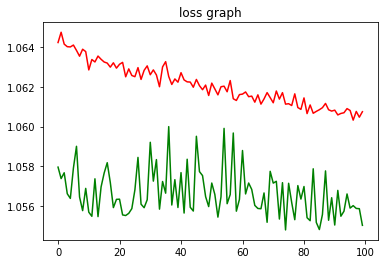

In [17]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'g')
plt.title('loss graph')
plt.show()

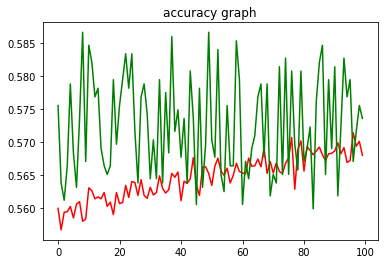

In [18]:
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'g')
plt.title('accuracy graph')
plt.show()

In [44]:
model.load_weights('../models/MOBNETv2-best_loss_model.h5')

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_11 (Lambda)          (None, 100, 100, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_11  (None, 1280)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_9 (Flatten)         (None, 1280)              0         
                                                                 
 dense_11 (Dense)            (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 12,810
Non-

In [46]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=100,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 1/100
432/432 [==============================] - 135s 304ms/step - loss: 1.0644 - categorical_accuracy: 0.5584 - accuracy: 0.5584 - val_loss: 1.0581 - val_categorical_accuracy: 0.5592 - val_accuracy: 0.5592
Epoch 2/100
432/432 [==============================] - 128s 296ms/step - loss: 1.0643 - categorical_accuracy: 0.5577 - accuracy: 0.5577 - val_loss: 1.0569 - val_categorical_accuracy: 0.5710 - val_accuracy: 0.5710
Epoch 3/100
432/432 [==============================] - 124s 287ms/step - loss: 1.0644 - categorical_accuracy: 0.5566 - accuracy: 0.5566 - val_loss: 1.0568 - val_categorical_accuracy: 0.5755 - val_accuracy: 0.5755
Epoch 4/100
432/432 [==============================] - 122s 282ms/step - loss: 1.0638 - categorical_accuracy: 0.5592 - accuracy: 0.5592 - val_loss: 1.0583 - val_categorical_accuracy: 0.5579 - val_accuracy: 0.5579
Epoch 5/100
432/432 [==============================] - 125s 288ms/step - loss: 1.0642 - categorical_accuracy: 0.5586 - accuracy: 0.5586 - val_loss: 

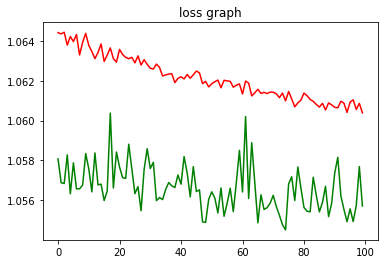

In [47]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'g')
plt.title('loss graph')
plt.show()

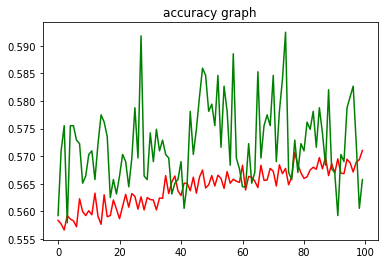

In [48]:
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'g')
plt.title('accuracy graph')
plt.show()

### MobileNetV2 Architecture based Model Training

In [4]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, DepthwiseConv2D, GlobalAveragePooling2D, Dense, Add, Multiply, Lambda, Reshape

def conv_block(inputs, filters, kernel_size, strides):
    x = Conv2D(filters, kernel_size, strides=strides, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

def depthwise_conv_block(inputs, expansion, strides):
    in_channels = inputs.shape[-1]
    
    x = Conv2D(expansion * in_channels, (1, 1), strides=(1, 1), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = DepthwiseConv2D((3, 3), strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Conv2D(in_channels, (1, 1), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    
    if strides == (1, 1):
        x = Add()([x, inputs])
    
    return x

def MobileNetV2(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    
    # Preprocessing Lambda layer
    x = Lambda(lambda x: x / 127.5 - 1.0)(inputs)
    
    # First Convolution layer
    x = conv_block(x, 32, (3, 3), strides=(2, 2))
    
    # Inverted Residual Block 1
    x = depthwise_conv_block(x, 1, strides=(1, 1))
    x = depthwise_conv_block(x, 6, strides=(2, 2))
    
    # Inverted Residual Block 2
    x = depthwise_conv_block(x, 6, strides=(1, 1))
    x = depthwise_conv_block(x, 6, strides=(2, 2))
    
    # Inverted Residual Block 3
    x = depthwise_conv_block(x, 6, strides=(1, 1))
    x = depthwise_conv_block(x, 6, strides=(2, 2))
    
    # Inverted Residual Block 4
    x = depthwise_conv_block(x, 6, strides=(1, 1))
    x = depthwise_conv_block(x, 6, strides=(1, 1))
    x = depthwise_conv_block(x, 6, strides=(1, 1))
    x = depthwise_conv_block(x, 6, strides=(1, 1))
    x = depthwise_conv_block(x, 6, strides=(1, 1))
    
    # Inverted Residual Block 5
    x = depthwise_conv_block(x, 6, strides=(2, 2))
    x = depthwise_conv_block(x, 6, strides=(1, 1))
    
    # Last Convolution layer
    x = conv_block(x, 1280, (1, 1), strides=(1, 1))
    
    # Global Average Pooling and Dense layer
    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs, x)
    return model

# Create the MobileNetV2 model
input_shape = (IMAGE_HEIGHT, IMAGE_LENGTH, IMAGE_CHANNELS)
num_classes = 10
model = MobileNetV2(input_shape, num_classes)

model.compile(loss='squared_hinge', optimizer='adam', metrics=['categorical_accuracy', 'accuracy'])

# Print the model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 100, 100, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 50, 50, 32)   896         ['lambda[0][0]']                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 50, 50, 32)  128         ['conv2d[0][0]']             

In [7]:
datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    height_shift_range=0.2,
    width_shift_range=0.2,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    TRAIN_DATA_PATH,
    target_size=(IMAGE_HEIGHT, IMAGE_LENGTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
test_generator = datagen.flow_from_directory(
    TEST_DATA_PATH,
    target_size=(IMAGE_HEIGHT, IMAGE_LENGTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 13824 images belonging to 10 classes.
Found 1536 images belonging to 10 classes.


In [5]:
best_loss_checkpoint = ModelCheckpoint(
    filepath=f'../models/MOBNETv2-best_loss_model.h5',
    monitor='loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)

best_val_loss_checkpoint = ModelCheckpoint(
    filepath=f'../models/MOBNETv2-best_val_loss_model.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)

In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=100,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 1/100
432/432 [==============================] - 749s 2s/step - loss: 1.0902 - categorical_accuracy: 0.4843 - accuracy: 0.4843 - val_loss: 1.1901 - val_categorical_accuracy: 0.0710 - val_accuracy: 0.0710
Epoch 2/100
432/432 [==============================] - 596s 1s/step - loss: 1.0703 - categorical_accuracy: 0.5362 - accuracy: 0.5362 - val_loss: 1.0887 - val_categorical_accuracy: 0.5000 - val_accuracy: 0.5000
Epoch 3/100
432/432 [==============================] - 607s 1s/step - loss: 1.0569 - categorical_accuracy: 0.5738 - accuracy: 0.5738 - val_loss: 1.1056 - val_categorical_accuracy: 0.4427 - val_accuracy: 0.4427
Epoch 4/100
432/432 [==============================] - 609s 1s/step - loss: 1.0517 - categorical_accuracy: 0.5900 - accuracy: 0.5900 - val_loss: 1.0802 - val_categorical_accuracy: 0.5247 - val_accuracy: 0.5247
Epoch 5/100
432/432 [==============================] - 611s 1s/step - loss: 1.0463 - categorical_accuracy: 0.6059 - accuracy: 0.6059 - val_loss: 1.0864 - val_ca

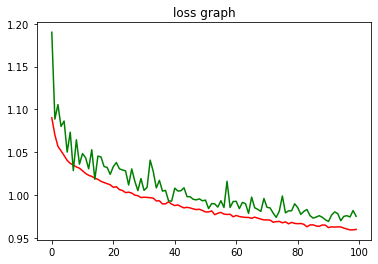

In [7]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'g')
plt.title('loss graph')
plt.show()

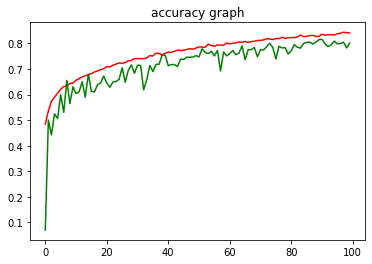

In [8]:
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'g')
plt.title('accuracy graph')
plt.show()

In [8]:
model.load_weights('../models/MOBNETv2-best_loss_model.h5')

In [13]:
best_acc_checkpoint = ModelCheckpoint(
    filepath=f'../models/MOBNETv2-best_acc_model.h5',
    monitor='accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max'
)

best_val_acc_checkpoint = ModelCheckpoint(
    filepath=f'../models/MOBNETv2-best_val_acc_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max'
)

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=150,
    initial_epoch=100,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 101/150
432/432 [==============================] - 504s 1s/step - loss: 0.9602 - categorical_accuracy: 0.8406 - accuracy: 0.8406 - val_loss: 0.9741 - val_categorical_accuracy: 0.7995 - val_accuracy: 0.7995
Epoch 102/150
432/432 [==============================] - 493s 1s/step - loss: 0.9593 - categorical_accuracy: 0.8437 - accuracy: 0.8437 - val_loss: 0.9816 - val_categorical_accuracy: 0.7812 - val_accuracy: 0.7812
Epoch 103/150
432/432 [==============================] - 487s 1s/step - loss: 0.9601 - categorical_accuracy: 0.8396 - accuracy: 0.8396 - val_loss: 0.9789 - val_categorical_accuracy: 0.7891 - val_accuracy: 0.7891
Epoch 104/150
432/432 [==============================] - 492s 1s/step - loss: 0.9588 - categorical_accuracy: 0.8437 - accuracy: 0.8437 - val_loss: 0.9717 - val_categorical_accuracy: 0.8086 - val_accuracy: 0.8086
Epoch 105/150
432/432 [==============================] - 490s 1s/step - loss: 0.9599 - categorical_accuracy: 0.8406 - accuracy: 0.8406 - val_loss: 0.977

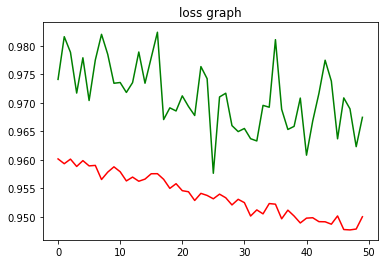

In [12]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'g')
plt.title('loss graph')
plt.show()

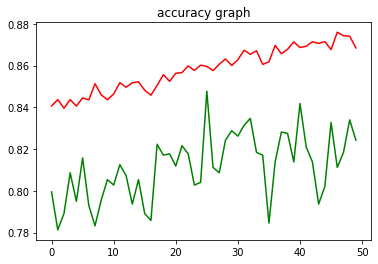

In [13]:
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'g')
plt.title('accuracy graph')
plt.show()

In [13]:
testX = np.load('../numpy/testX.npy')
testY = np.load('../numpy/testY.npy')

In [14]:
model.load_weights('../models/MOBNETv2-best_loss_model.h5')

In [15]:
model.evaluate(testX, testY)

48/48 [==============================] - 13s 253ms/step - loss: 0.9668 - categorical_accuracy: 0.8255 - accuracy: 0.8255


[0.9667983651161194, 0.8255208134651184, 0.8255208134651184]

In [16]:
model.load_weights('../models/MOBNETv2-best_val_loss_model.h5')

In [17]:
model.evaluate(testX, testY)

48/48 [==============================] - 14s 287ms/step - loss: 0.9512 - categorical_accuracy: 0.8652 - accuracy: 0.8652


[0.9512482285499573, 0.865234375, 0.865234375]

In [19]:
preds = model.predict(testX)
confusion = confusion_matrix(
    np.argmax(testY, axis=1),
    np.argmax(preds, axis=1)
)
confusion

array([[  9,   1,   0,   0,   3,   2,   5,   1,   2,   2],
       [  3,  80,   4,   0,   0,   0,   1,   0,   0,   1],
       [  0,   0, 525,   0,   0,   0,   0,   1,   0,   6],
       [  0,   1,  11,  76,   2,   1,   0,   1,   1,   5],
       [  0,   0,   1,   8, 233,   1,   1,   1,   1,   5],
       [  0,   2,  10,   3,   2,  42,   3,   0,   5,   3],
       [  1,   2,   4,   0,   5,   2,  50,   8,   3,   2],
       [  0,   0,   3,   0,   2,   0,   0,  98,   1,   1],
       [  0,   3,   2,   1,   6,   0,   5,  10,  63,   1],
       [  0,   8,  18,   3,   2,   9,   2,   2,   1, 153]], dtype=int64)

<AxesSubplot:xlabel='predicted', ylabel='actual'>

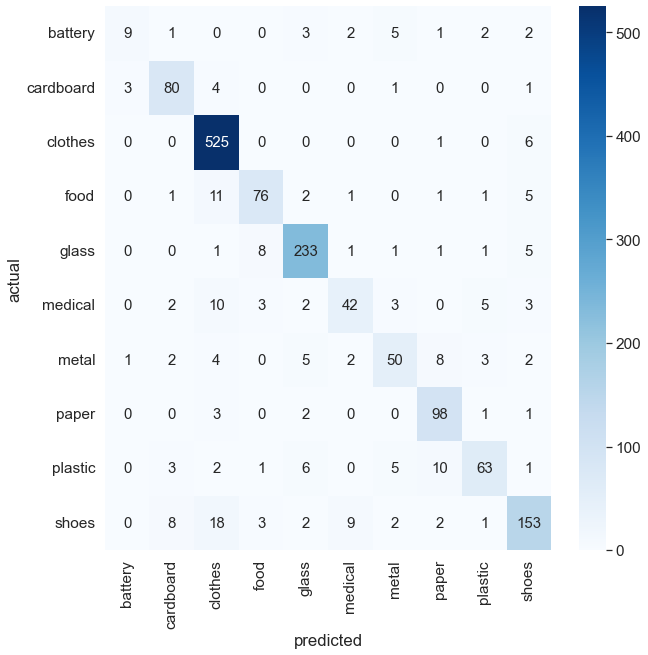

In [20]:
labels = ['battery', 'cardboard', 'clothes', 'food', 'glass', 'medical', 'metal', 'paper', 'plastic', 'shoes']

df_cm = pd.DataFrame(confusion, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'actual'
df_cm.columns.name = 'predicted'
plt.figure(figsize = (10, 10))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 15}, fmt="d")

In [21]:
class_pred_sums = np.sum(confusion, axis=1)
class_pred_sums

array([ 25,  89, 532,  98, 251,  70,  77, 105,  91, 198], dtype=int64)

In [23]:
class_preds = []

for i in range(len(confusion)):
    class_preds.append(confusion[i][i])
 
class_preds = np.array(class_preds)
class_preds

array([  9,  80, 525,  76, 233,  42,  50,  98,  63, 153], dtype=int64)

In [24]:
individual_class_accs = class_preds / class_pred_sums
individual_class_accs

array([0.36      , 0.8988764 , 0.98684211, 0.7755102 , 0.92828685,
       0.6       , 0.64935065, 0.93333333, 0.69230769, 0.77272727])

In [31]:
for i in range(len(labels)):
    print(labels[i], ':', round(individual_class_accs[i] * 100, 0), '%')

battery : 36.0 %
cardboard : 90.0 %
clothes : 99.0 %
food : 78.0 %
glass : 93.0 %
medical : 60.0 %
metal : 65.0 %
paper : 93.0 %
plastic : 69.0 %
shoes : 77.0 %


In [39]:
np.random.shuffle(testX)

In [40]:
predictions = []

for image in testX:
    image = np.reshape(image, (1, 100, 100, 3))
    prediction = model.predict(image)
    arg_max = np.argmax(prediction, axis=1)[0]
    label = labels[arg_max]
    predictions.append((label, prediction[0][arg_max]))

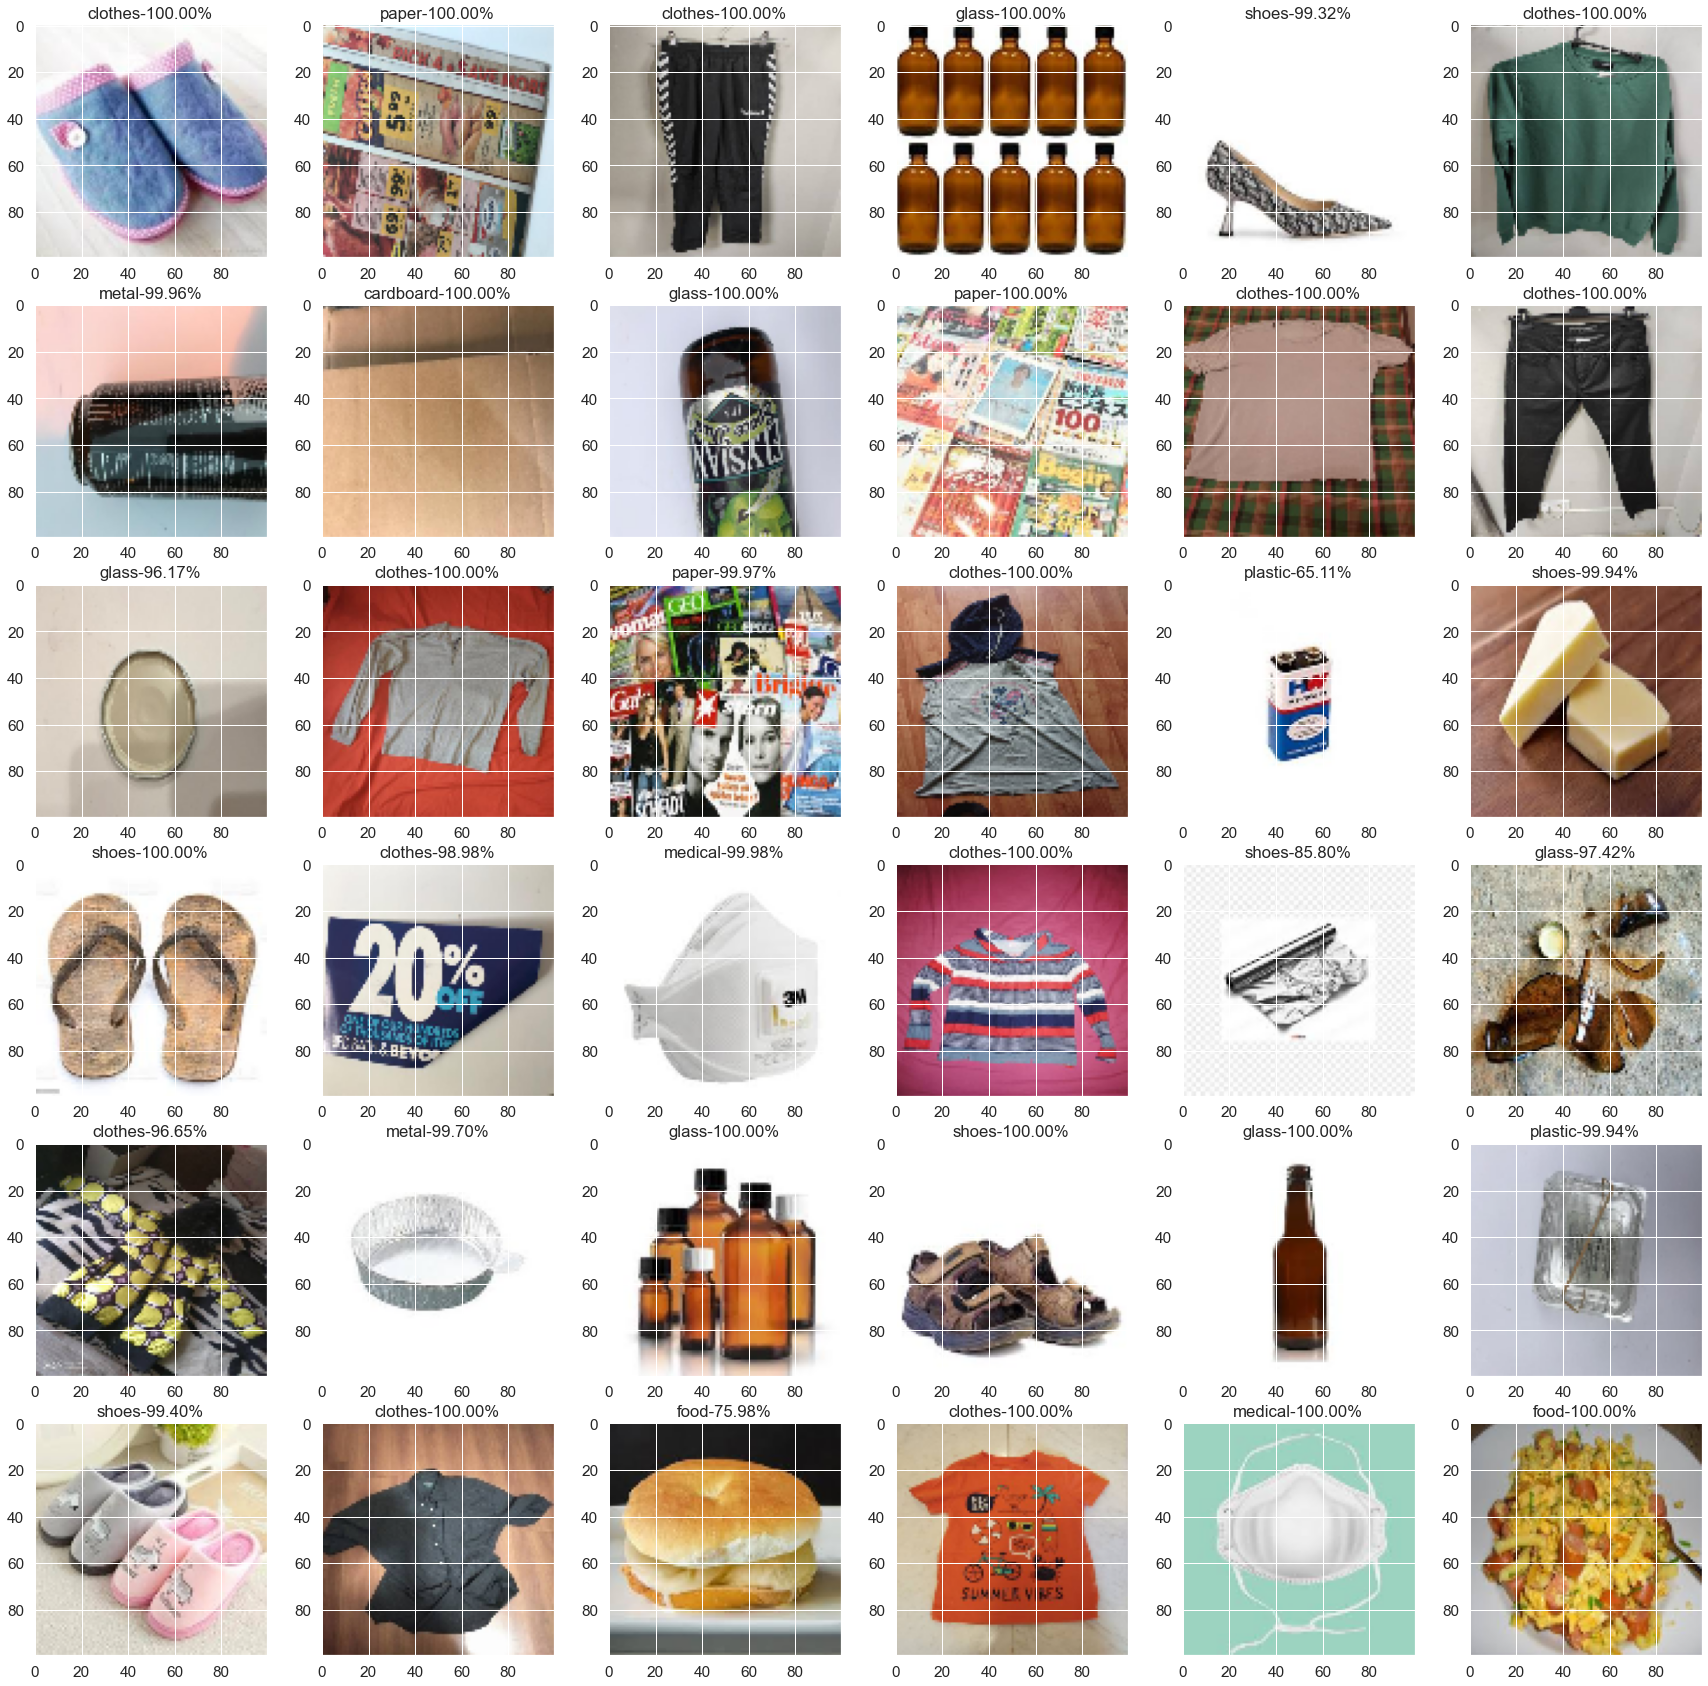

In [41]:
figure = plt.figure(figsize=(30, 30))
cols = 6
rows = 6

for i in range(cols * rows):
    image = testX[i]
    figure.add_subplot(rows, cols, i + 1)
    plt.title(predictions[i][0] + "-" + "{0:.2f}%".format(predictions[i][1] * 100))
    plt.imshow(image)
plt.show()